# First Example => Verdebout Exemple => HD4.pdf

Importance of components:
                          PC1     PC2     PC3       PC4
Standard deviation     2.4203 0.57614 0.29059 2.306e-15
Proportion of Variance 0.9336 0.05291 0.01346 0.000e+00
Cumulative Proportion  0.9336 0.98654 1.00000 1.000e+00

                  PC1          PC2         PC3         PC4
X100m    -0.026897177  0.181384849 -0.12244745 -0.29082396
X200m    -0.066712409  0.111692451 -0.09402747  0.79790567
X400m    -0.250155121  0.918705708  0.05922615  0.05725822
X800m    -0.007662422  0.008609984  0.02585826  0.01094758
X1500m   -0.010206832  0.097541577  0.05942498 -0.04347185
X5000m   -0.085887743  0.146500588  0.33639862 -0.47667051
X10000m  -0.114080734 -0.124680132  0.91326924  0.21045060
Marathon -0.954826896 -0.252998234 -0.14571548 -0.04444751


Importance of components:
                          PC1    PC2     PC3      PC4
Standard deviation     2.4499 1.2008 0.74562 1.18e-14
Proportion of Variance 0.7503 0.1802 0.06949 0.00e+00
Cumulative Proportion  0.7503 0.9305 1.00000 1.00e+00

[1] 0.7502695 0.9305061 1.0000000 1.0000000


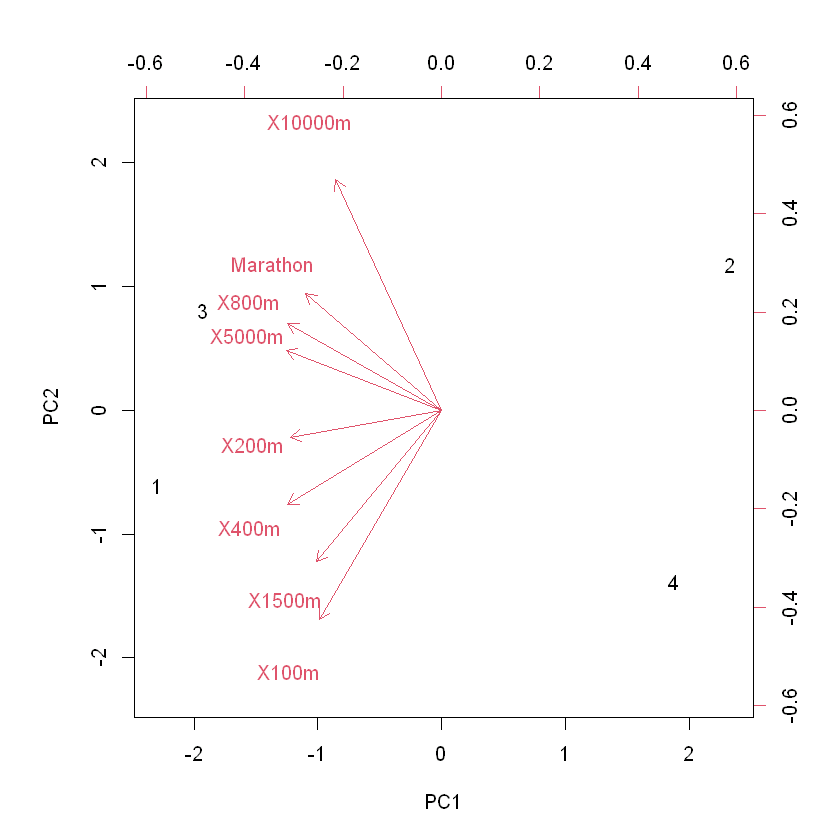

In [2]:
# Loading the data
track <- data.frame(
  Country = c("Arg", "Aus", "Aut", "Bel"),
  `100m` = c(10.23, 9.93, 10.15, 10.14),
  `200m` = c(20.37, 20.06, 20.45, 20.19),
  `400m` = c(46.18, 44.38, 45.80, 45.02),
  `800m` = c(1.77, 1.74, 1.77, 1.73),
  `1500m` = c(3.68, 3.53, 3.58, 3.57),
  `5000m` = c(13.33, 12.93, 13.26, 12.83),
  `10000m` = c(27.65, 27.53, 27.72, 26.87),
  Marathon = c(129.57, 127.51, 132.22, 127.20)
)

# Remove the country column for analysis
track_data <- track[, -1]

# Standard PCA (without scaling)
pca_no_scaling <- prcomp(track_data, scale. = FALSE)

# Results of the standard PCA
summary(pca_no_scaling)

# Display the rotation coefficients
print(pca_no_scaling$rotation)

# Standardized PCA (with scaling)
pca_scaling <- prcomp(track_data, scale. = TRUE)

# Results of the standardized PCA
summary(pca_scaling)

# Visualization of the first two principal components (biplot)
biplot(pca_scaling, scale = 0)

# Proportion of variance explained (standardized)
pr_var <- pca_scaling$sdev^2
pve <- pr_var / sum(pr_var)

# Cumulative proportions
cumulative_pve <- cumsum(pve)
print(cumulative_pve)


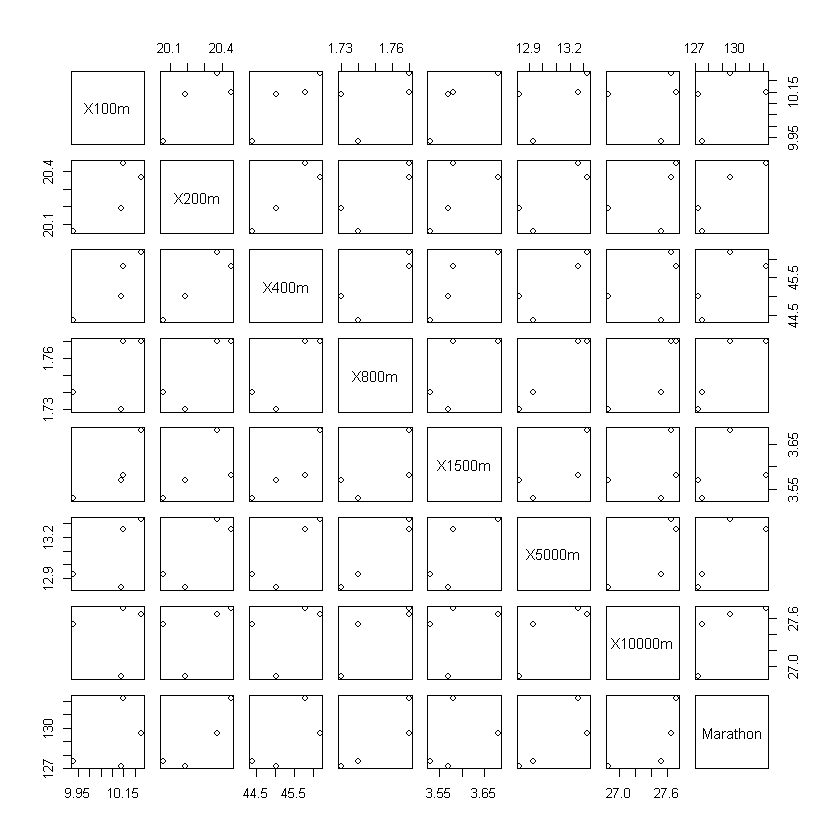

In [4]:
plot(track[2:9])

In [6]:
# Loading the package
library(elasticnet)

# Normalizing the data
track_data_scaled <- scale(track_data)

# Applying Sparse PCA
# The `spca()` function expects the covariance matrix as input.
spca_result <- spca(cov(track_data_scaled), K = 4, para = rep(2, 4))

# Results of Sparse PCA
print("Principal components (Sparse):")
print(spca_result$loadings)

# Scores of observations
sparse_scores <- track_data_scaled %*% spca_result$loadings
print("Scores of observations:")
print(sparse_scores)

# Visualization of scores (Sparse PCA)
plot(sparse_scores[, 1], sparse_scores[1, 2],
     xlab = "Sparse PC1", ylab = "Sparse PC2", main = "Sparse PCA",
     col = "blue", pch = 19)
abline(h = 0, v = 0, lty = 2)

# Extracting explained variances (proportion)
explained_var <- apply(sparse_scores, 2, var)
prop_explained_var <- explained_var / sum(explained_var)
print("Proportion of variance explained by each component:")
print(prop_explained_var)

Le chargement a nécessité le package : lars

Loaded lars 1.3




[1] "Principal components (Sparse):"
         PC1 PC2 PC3 PC4
X100m      0   0   0   0
X200m      0   0   0   0
X400m      0   0   0   0
X800m      0   0   0   0
X1500m     0   0   0   0
X5000m     0   0   0   0
X10000m    1   0   0   0
Marathon   0   0   0   0
[1] "Scores of observations:"
            PC1 PC2 PC3 PC4
[1,]  0.5325329   0   0   0
[2,]  0.2245621   0   0   0
[3,]  0.7121826   0   0   0
[4,] -1.4692776   0   0   0


ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): les longueurs de 'x' et 'y' diffèrent


# Second Example => IRIS database

In [9]:
library(factoextra)

Le chargement a nécessité le package : ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Importance of components:
                          PC1     PC2    PC3     PC4
Standard deviation     2.0563 0.49262 0.2797 0.15439
Proportion of Variance 0.9246 0.05307 0.0171 0.00521
Cumulative Proportion  0.9246 0.97769 0.9948 1.00000

                     PC1         PC2         PC3        PC4
Sepal.Length  0.36138659 -0.65658877  0.58202985  0.3154872
Sepal.Width  -0.08452251 -0.73016143 -0.59791083 -0.3197231
Petal.Length  0.85667061  0.17337266 -0.07623608 -0.4798390
Petal.Width   0.35828920  0.07548102 -0.54583143  0.7536574


Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

[1] 0.7296245 0.9581321 0.9948213 1.0000000


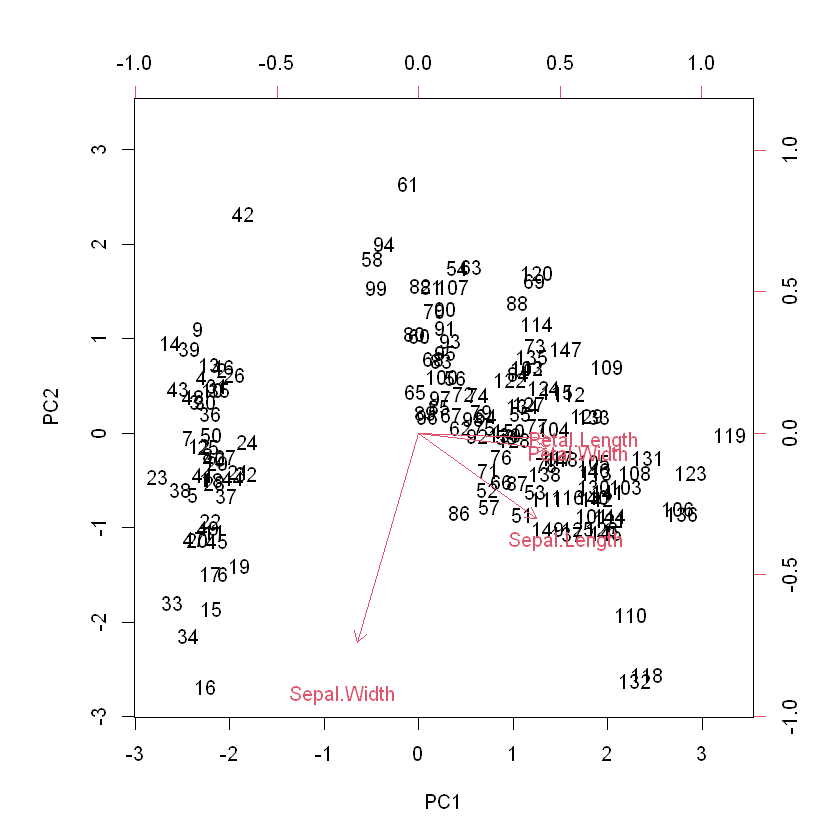

In [11]:
# Charger les données iris
data(iris)
iris_data <- iris[, 1:4]

# PCA standard (sans standardisation)
pca_no_scaling <- prcomp(iris_data, scale. = FALSE)

# Résultats de la PCA standard
summary(pca_no_scaling)

# Affichage des coefficients de rotation
print(pca_no_scaling$rotation)

# PCA standardisée (avec standardisation)
pca_scaling <- prcomp(iris_data, scale. = TRUE)

# Résultats de la PCA standardisée
summary(pca_scaling)

# Visualisation des deux premières composantes principales (biplot)
biplot(pca_scaling, scale = 0)

# Proportion de variance expliquée (standardisée)
pr_var <- pca_scaling$sdev^2
pve <- pr_var / sum(pr_var)

# Proportions cumulées
cumulative_pve <- cumsum(pve)
print(cumulative_pve)


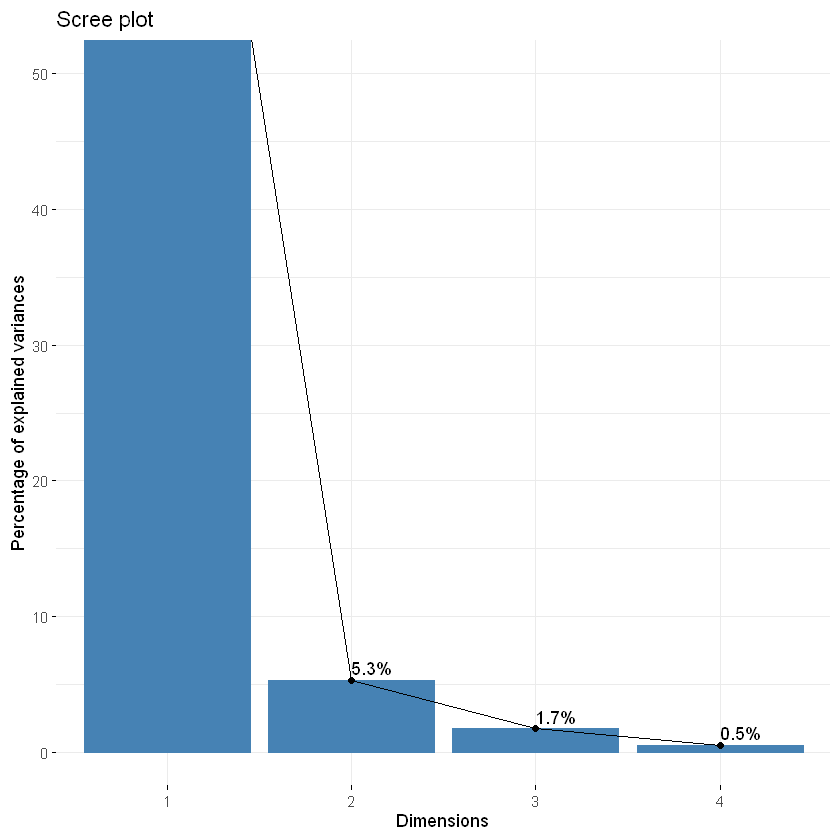

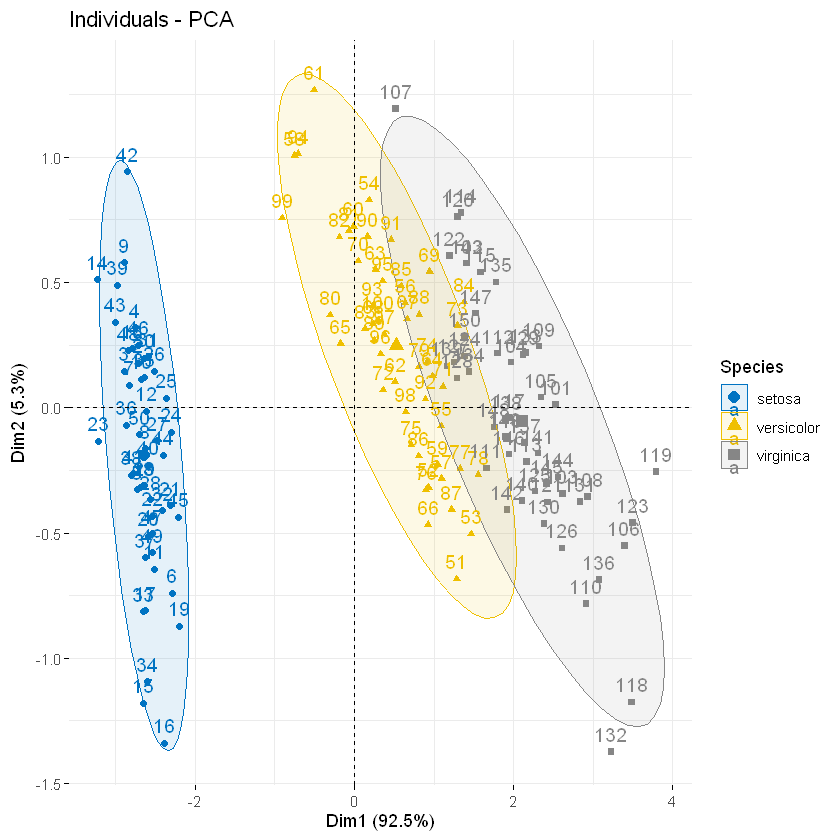

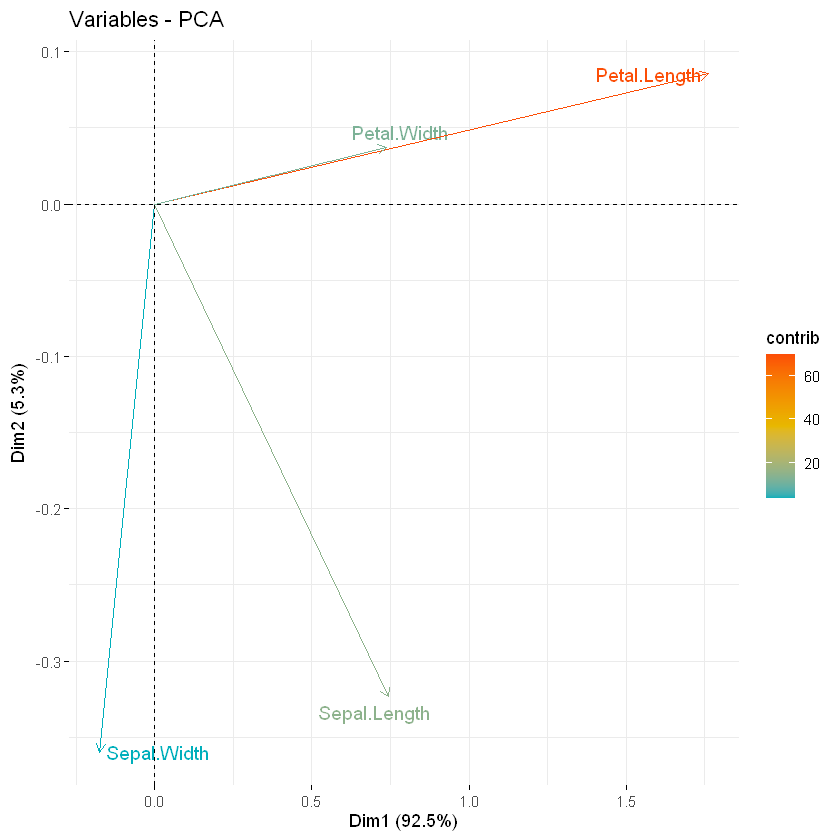

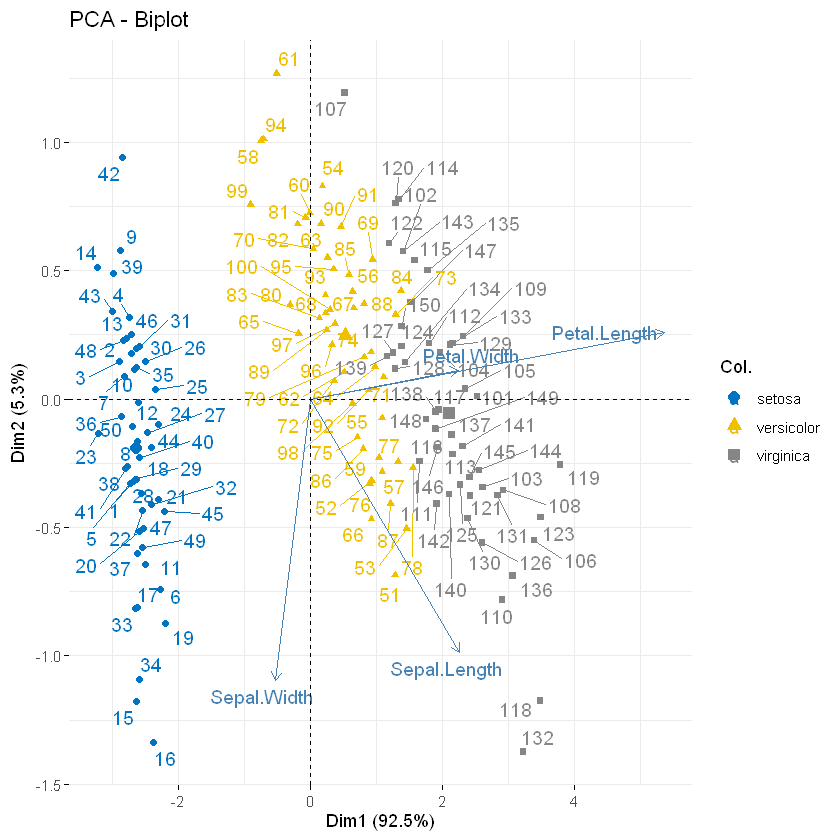

In [13]:
# Without Scaling

# Visualize the scree plot of explained variances
fviz_eig(pca_no_scaling, addlabels = TRUE, ylim = c(0, 50))

# Visualize individuals in the principal component space
fviz_pca_ind(pca_no_scaling, 
             col.ind = iris$Species,  # Coloring by species
             palette = "jco",
             addEllipses = TRUE,      # Add group ellipses
             legend.title = "Species")

# Visualize variables in the principal component space
fviz_pca_var(pca_no_scaling, 
             col.var = "contrib",     # Coloring by contribution
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)            # Avoid overlapping labels

# Visualize both individuals and variables
fviz_pca_biplot(pca_no_scaling, 
                col.ind = iris$Species, 
                palette = "jco", 
                repel = TRUE)

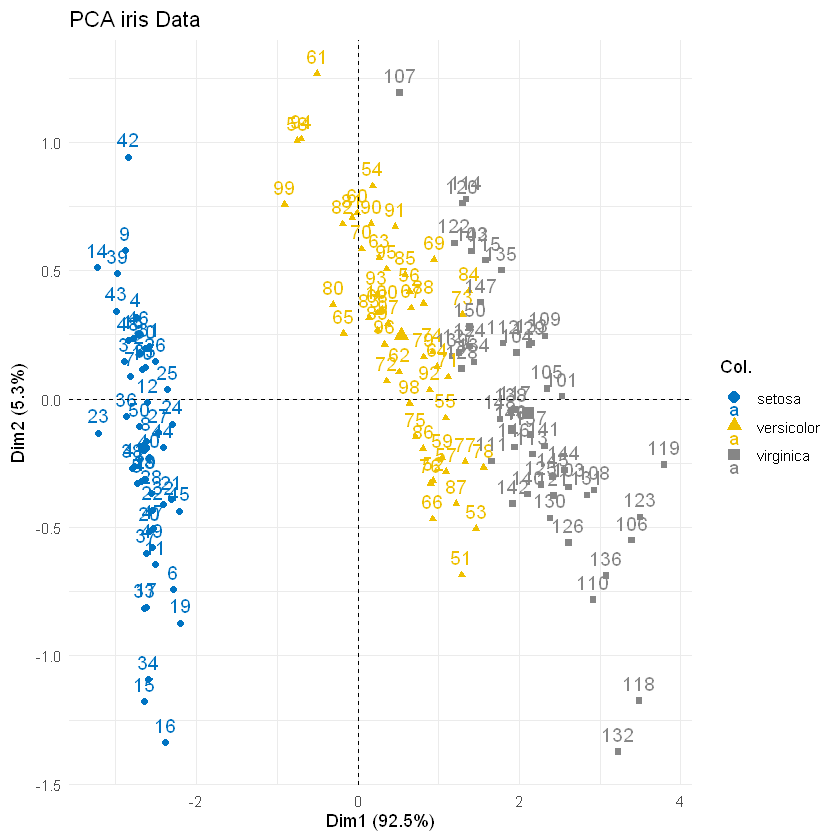

In [14]:
fviz_pca_ind(pca_no_scaling, 
             col.ind = iris$Species, 
             palette = "jco") +
  theme_minimal() +
  ggtitle("PCA iris Data")

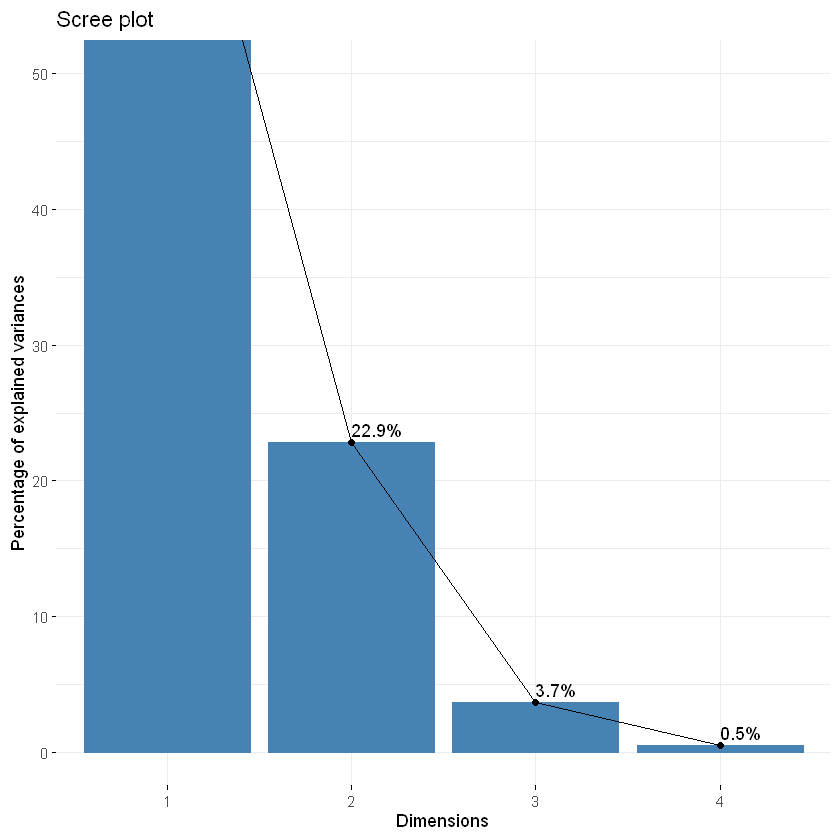

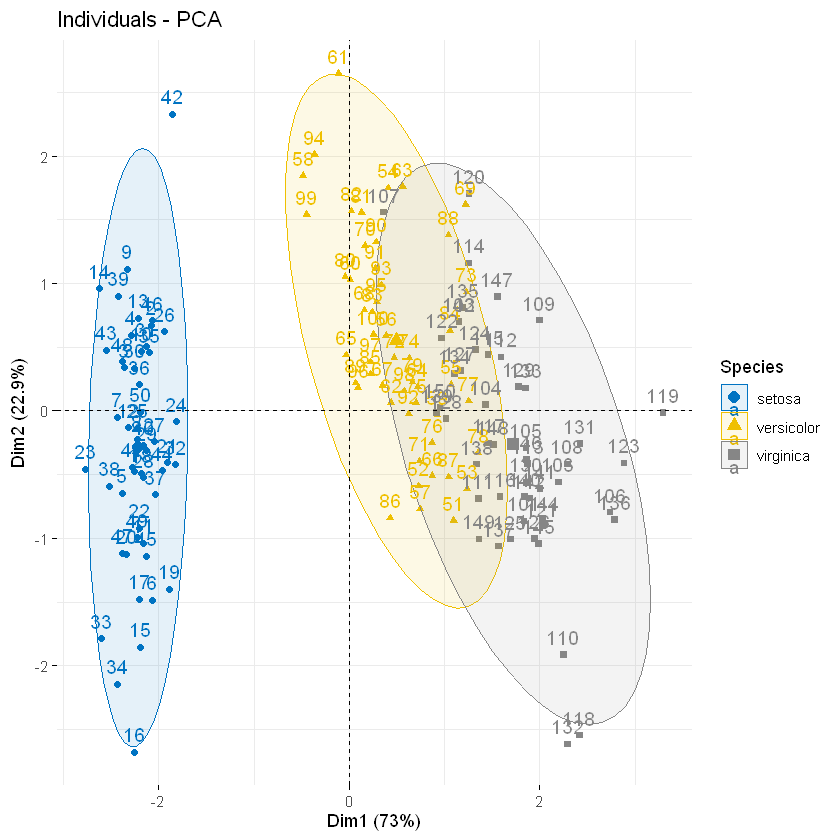

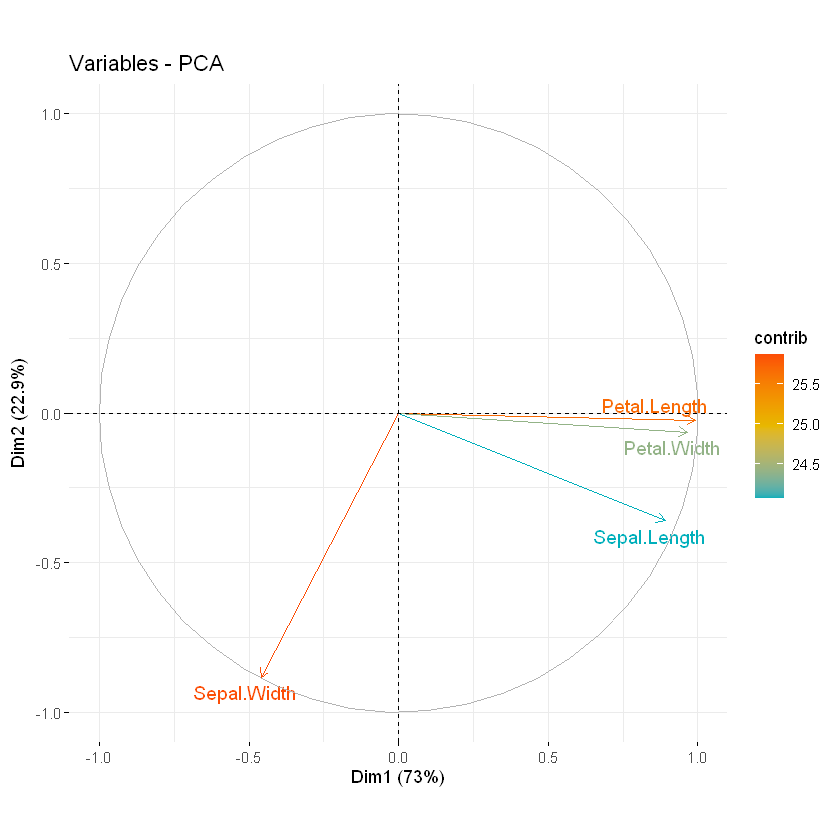

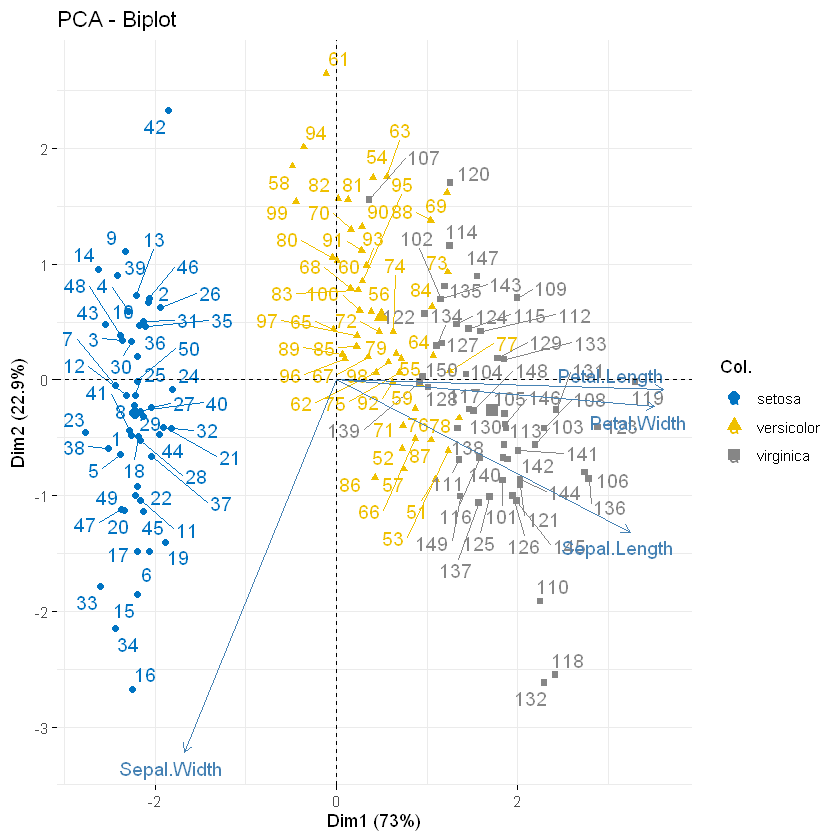

In [16]:
# With Scaling

# Visualize the scree plot of explained variances
fviz_eig(pca_scaling, addlabels = TRUE, ylim = c(0, 50))

# Visualize individuals in the principal component space
fviz_pca_ind(pca_scaling, 
             col.ind = iris$Species,  # Coloring by species
             palette = "jco",
             addEllipses = TRUE,      # Add group ellipses
             legend.title = "Species")

# Visualize variables in the principal component space
fviz_pca_var(pca_scaling, 
             col.var = "contrib",     # Coloring by contribution
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)            # Avoid overlapping labels

# Visualize both individuals and variables
fviz_pca_biplot(pca_scaling, 
                col.ind = iris$Species, 
                palette = "jco", 
                repel = TRUE)

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


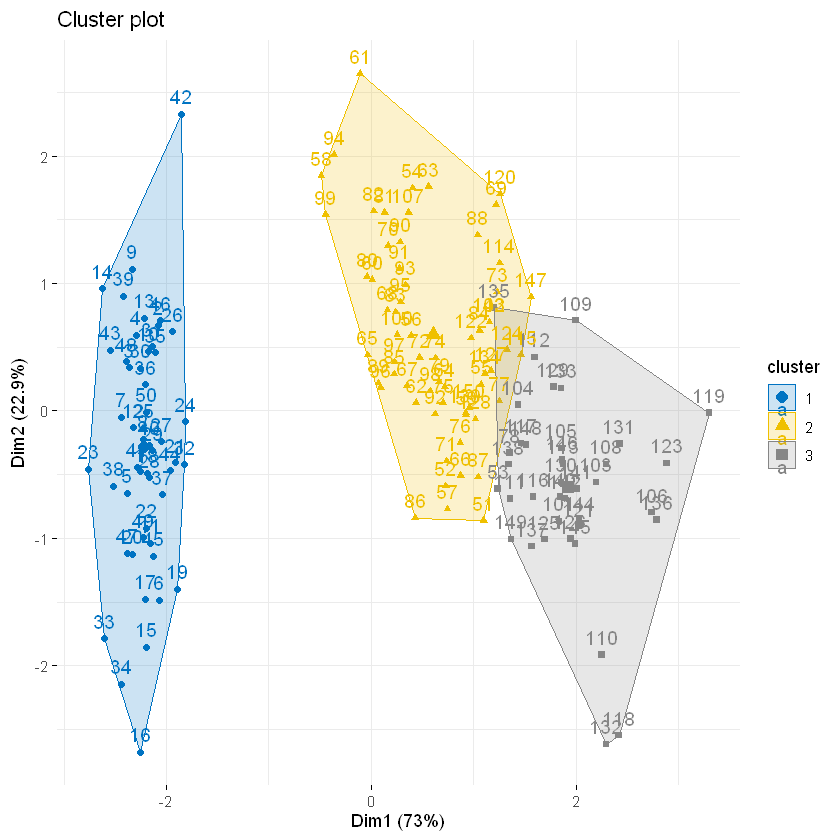

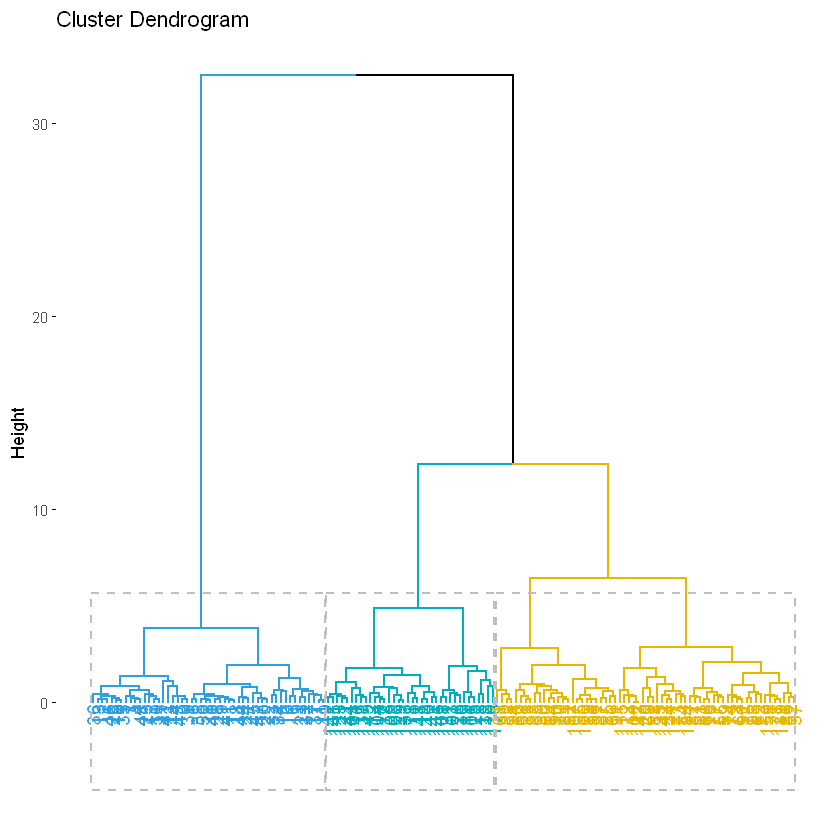

In [17]:
# Clustering K-means
set.seed(123)
km_res <- kmeans(iris_data, centers = 3, nstart = 25)

# Clusters
fviz_cluster(km_res, data = iris_data, 
             ellipse.type = "convex", 
             palette = "jco", 
             ggtheme = theme_minimal())

# Classification
hc_res <- hclust(dist(iris_data), method = "ward.D2")
fviz_dend(hc_res, k = 3, 
          k_colors = c("#2E9FDF", "#00AFBB", "#E7B800"),
          rect = TRUE)


In [21]:
iris_data

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2
